<a href="https://colab.research.google.com/github/vinay10949/AnalyticsAndML/blob/master/Python/BIng_search_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

# Steps to signup for the API

- Go to the url and follow the steps Under Bing Search APIs v7 section. Most of it is self explanatory

- https://azure.microsoft.com/en-in/try/cognitive-services/?api=search-api-v7

- After signing up, you will get couple of keys which are valid for 7 days, copy and use them here.

### API Keys adding them to *envs*

In [ ]:
# Make a note of your API-Keys from AZURE

In [ ]:
BING_SEARCH_V7_SUBSCRIPTION_KEY = input("Subscription key : ") # input the above API key here.

In [ ]:
import os

# Add your Bing Search V7 subscription key and endpoint to your environment variables.
os.environ['BING_SEARCH_V7_SUBSCRIPTION_KEY'] = BING_SEARCH_V7_SUBSCRIPTION_KEY

# Using the Bing search API with key

## Query - 1

In [ ]:
import json
import os 
from pprint import pprint
import requests


In [ ]:
query = "Microsoft Cognitive Services"
query

'Microsoft Cognitive Services'

In [ ]:
headers = {
      # Request headers
      'Ocp-Apim-Subscription-Key': os.environ['BING_SEARCH_V7_SUBSCRIPTION_KEY'],
}

In [ ]:
import http.client, urllib.request, urllib.parse, urllib.error, base64
import json

def search(query, offset=0, count=10):

  params = urllib.parse.urlencode({
      # Request parameters
      'q': query,
      'count': count,
      'offset': offset,
      'mkt': 'en-us',
      'safesearch': 'Moderate',
  })

  try:
      conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
      conn.request("GET", "/bing/v7.0/search?%s" % params, "{body}", headers)
      response = conn.getresponse()
      data = response.read()
      conn.close()
  except Exception as e:
      print("[Errno {0}] {1}".format(e.errno, e.strerror))

  return json.loads(data)

In [ ]:
res = search(query, offset=0, count=5)
res.keys()
for k,v in res.items():
  print("{:15s} : {}".format(k, v))

b'{"_type": "SearchResponse", "queryContext": {"originalQuery": "Microsoft Cognitive Services"}, "webPages": {"webSearchUrl": "https:\\/\\/www.bing.com\\/search?q=Microsoft+Cognitive+Services", "totalEstimatedMatches": 50700000, "value": [{"id": "https:\\/\\/api.cognitive.microsoft.com\\/api\\/v7\\/#WebPages.0", "name": "Microsoft Cognitive Services", "url": "https:\\/\\/www.microsoft.com\\/cognitive-services", "isFamilyFriendly": true, "displayUrl": "https:\\/\\/www.microsoft.com\\/cognitive-services", "snippet": "Knock down barriers between you and your ideas. Enable natural and contextual interaction with tools that augment users\' experiences via the power of machine-based AI. Plug them in and bring your ideas to life.", "language": "", "isNavigational": true}, {"id": "https:\\/\\/api.cognitive.microsoft.com\\/api\\/v7\\/#WebPages.1", "name": "Cognitive Services\xe2\x80\x94APIs for AI Developers | Microsoft Azure", "url": "https:\\/\\/azure.microsoft.com\\/en-us\\/services\\/cognit

 

---


### web Pages

In [ ]:
for k,v in res['webPages'].items():
  print("{:23s}: {}".format(k, v))

webSearchUrl           : https://www.bing.com/search?q=Microsoft+Cognitive+Services
totalEstimatedMatches  : 50700000
value                  : [{'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.0', 'name': 'Microsoft Cognitive Services', 'url': 'https://www.microsoft.com/cognitive-services', 'isFamilyFriendly': True, 'displayUrl': 'https://www.microsoft.com/cognitive-services', 'snippet': "Knock down barriers between you and your ideas. Enable natural and contextual interaction with tools that augment users' experiences via the power of machine-based AI. Plug them in and bring your ideas to life.", 'language': '', 'isNavigational': False}, {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.1', 'name': 'Cognitive Services—APIs for AI Developers | Microsoft Azure', 'url': 'https://azure.microsoft.com/en-us/services/cognitive-services/', 'isFamilyFriendly': True, 'displayUrl': 'https://azure.microsoft.com/en-us/services/cognitive-services', 'snippet': 'Cognitive Servi

In [ ]:
for page in res['webPages']['value']:
  print(page.keys())

dict_keys(['id', 'name', 'url', 'isFamilyFriendly', 'displayUrl', 'snippet', 'language', 'isNavigational'])
dict_keys(['id', 'name', 'url', 'isFamilyFriendly', 'displayUrl', 'snippet', 'dateLastCrawled', 'language', 'isNavigational'])


In [ ]:
for page in res['webPages']['value']:
  for k,v in page.items():
    print("{:17s}: {}".format(k, v))
  print('='*30)

---

### Related Searches 


- These will appear on the bottom of each webpage

In [ ]:
res['relatedSearches']['value'][0]

{'displayText': 'microsoft cognitive services api',
 'text': 'microsoft cognitive services api',
 'webSearchUrl': 'https://www.bing.com/search?q=microsoft+cognitive+services+api'}

In [ ]:
# get the webpage results from the search results
for rs in res['relatedSearches']['value']:
  print(f"\n{rs['text']}:-- {rs['displayText']}\n\t{rs['webSearchUrl']}")


microsoft cognitive services api:-- microsoft cognitive services api
	https://www.bing.com/search?q=microsoft+cognitive+services+api

microsoft cognitive services free:-- microsoft cognitive services free
	https://www.bing.com/search?q=microsoft+cognitive+services+free

microsoft cognitive services ocr:-- microsoft cognitive services ocr
	https://www.bing.com/search?q=microsoft+cognitive+services+ocr

microsoft cognitive services tutorial:-- microsoft cognitive services tutorial
	https://www.bing.com/search?q=microsoft+cognitive+services+tutorial

bing cognitive services:-- bing cognitive services
	https://www.bing.com/search?q=bing+cognitive+services

microsoft cognitive services pricing:-- microsoft cognitive services pricing
	https://www.bing.com/search?q=microsoft+cognitive+services+pricing

microsoft cognitive services speech:-- microsoft cognitive services speech
	https://www.bing.com/search?q=microsoft+cognitive+services+speech

microsoft cognitive services text analytics:-- mi

### videos


In [ ]:
res['videos'].keys()

dict_keys(['id', 'readLink', 'webSearchUrl', 'isFamilyFriendly', 'value', 'scenario'])

In [ ]:
for k, v in res['videos'].items():
  print("{:17s}:  {}".format(k, v))

id               :  https://api.cognitive.microsoft.com/api/v7/#Videos
readLink         :  https://api.cognitive.microsoft.com/api/v7/videos/search?q=Microsoft+Cognitive+Services
webSearchUrl     :  https://www.bing.com/videos/search?q=Microsoft+Cognitive+Services
isFamilyFriendly :  True
value            :  [{'webSearchUrl': 'https://www.bing.com/videos/search?q=Microsoft%20Cognitive%20Services&view=detail&mid=37239BC8208D210CED2837239BC8208D210CED28', 'name': 'Real-time Face Recognition With Microsoft Cognitive Services | Jernej Kavka', 'description': "This session is all about Microsoft Face API in practice! || Subscribe for more content from SSW TV || || Press like and leave a comment below to let us know how we're doing || Twitter ↴ https://twitter.com/ssw_tv Facebook ↴ https://www.facebook.com/SSW.page/?fref=ts --- Description --- JK, the man behind www.sswSophie.com, will cover what ...", 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OVP.FeCRLLix9RoNqOLUOL8jAQEsDh&pid=Api', 'd

In [ ]:
for video in res['videos']['value']:
  for k,v in video.items():
    print('{:20s}: {}'.format(k, v))
  print('-'*100,'\n')

webSearchUrl        : https://www.bing.com/videos/search?q=Microsoft%20Cognitive%20Services&view=detail&mid=37239BC8208D210CED2837239BC8208D210CED28
name                : Real-time Face Recognition With Microsoft Cognitive Services | Jernej Kavka
description         : This session is all about Microsoft Face API in practice! || Subscribe for more content from SSW TV || || Press like and leave a comment below to let us know how we're doing || Twitter ↴ https://twitter.com/ssw_tv Facebook ↴ https://www.facebook.com/SSW.page/?fref=ts --- Description --- JK, the man behind www.sswSophie.com, will cover what ...
thumbnailUrl        : https://tse4.mm.bing.net/th?id=OVP.FeCRLLix9RoNqOLUOL8jAQEsDh&pid=Api
datePublished       : 2019-01-17T04:21:26.0000000
publisher           : [{'name': 'YouTube'}]
isAccessibleForFree : True
contentUrl          : https://www.youtube.com/watch?v=KCSyRO0KotA
hostPageUrl         : https://www.youtube.com/watch?v=KCSyRO0KotA
encodingFormat      : mp4
hostPageDispla

### rankingResponse

- It will contains the urls to get the next page results

In [ ]:
res['rankingResponse'].keys()

dict_keys(['mainline'])

In [ ]:
res['rankingResponse']['mainline'].keys()

dict_keys(['items'])

In [ ]:
for item in res['rankingResponse']['mainline']['items']:
  for k, v in item.items():
    print('{:15s}: {}'.format(k, v))
  print('-'*50, '\n')

answerType     : WebPages
resultIndex    : 0
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.0'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 1
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.1'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 2
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.2'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 3
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.3'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 4
value          : {'id': 'https://api.cognitive.microsoft.com/api/v7/#WebPages.4'}
-------------------------------------------------- 

answerType     : WebPages
resultIndex    : 5
value          : {'id': 'https://api.cognitive.microsof

### Bing search API Playground 

- You can try this live at https://azure.microsoft.com/en-in/services/cognitive-services/bing-web-search-api/

## Query - 2

- If you search for some persons, you will get some images and entities

In [ ]:
res = search("Srikant Varma Chekuri")
res.keys()
for k,v in res.items():
  print("{:15s} : {}".format(k, v))

b'{"_type": "SearchResponse", "queryContext": {"originalQuery": "Srikant Varma Chekuri", "alteredQuery": "srikanth varma chekuri", "alterationDisplayQuery": "srikanth varma chekuri", "alterationOverrideQuery": "+Srikant Varma Chekuri", "adultIntent": false}, "webPages": {"webSearchUrl": "https:\\/\\/www.bing.com\\/search?q=Srikant+Varma+Chekuri", "totalEstimatedMatches": 12300, "value": [{"id": "https:\\/\\/api.cognitive.microsoft.com\\/api\\/v7\\/#WebPages.0", "name": "Srikanth Varma Chekuri - Co-Founder - Applied AI Course ...", "url": "https:\\/\\/in.linkedin.com\\/in\\/cskvarma", "about": [{}, {}], "isFamilyFriendly": true, "displayUrl": "https:\\/\\/in.linkedin.com\\/in\\/cskvarma", "snippet": "View Srikanth Varma Chekuri\xe2\x80\x99s profile on LinkedIn, the world\'s largest professional community. Srikanth Varma has 5 jobs listed on their profile. See the complete profile on LinkedIn and discover Srikanth Varma\xe2\x80\x99s connections and jobs at similar companies.", "dateLastC

### queryContext

In [ ]:
for k, v in res['queryContext'].items():
  print('{:25s}: {}'.format(k, v))

originalQuery            : Srikant Varma Chekuri
alteredQuery             : srikanth varma chekuri
alterationDisplayQuery   : srikanth varma chekuri
alterationOverrideQuery  : +Srikant Varma Chekuri
adultIntent              : False


### webPages

In [ ]:
res['webPages'].keys()

dict_keys(['webSearchUrl', 'totalEstimatedMatches', 'value', 'someResultsRemoved'])

In [ ]:
res['webPages']['webSearchUrl'],res['webPages']['totalEstimatedMatches']

('https://www.bing.com/search?q=Srikant+Varma+Chekuri', 12300)

In [ ]:
for val in res['webPages']['value']:
  for k, v in val.items():
    print('{:10s}: {}'.format(k, v))
  print('-'*20, '\n')

id        : https://api.cognitive.microsoft.com/api/v7/#WebPages.0
name      : Srikanth Varma Chekuri - Co-Founder - Applied AI Course ...
url       : https://in.linkedin.com/in/cskvarma
about     : [{}, {}]
isFamilyFriendly: True
displayUrl: https://in.linkedin.com/in/cskvarma
snippet   : View Srikanth Varma Chekuri’s profile on LinkedIn, the world's largest professional community. Srikanth Varma has 5 jobs listed on their profile. See the complete profile on LinkedIn and discover Srikanth Varma’s connections and jobs at similar companies.
dateLastCrawled: 2020-02-23T21:18:00.0000000Z
language  : en
isNavigational: False
-------------------- 

id        : https://api.cognitive.microsoft.com/api/v7/#WebPages.1
name      : Srikanth Varma Chekuri - Quora
url       : https://www.quora.com/profile/Srikanth-Varma-Chekuri
isFamilyFriendly: True
displayUrl: https://www.quora.com/profile/Srikanth-Varma-Chekuri
snippet   : Srikanth Varma Chekuri, Instructor & Co-founder @ AppliedAICourse.com
da

### images

In [ ]:
for k, v in res['images'].items():
  if k!='value':
    print('{:20s}: {}'.format(k, v))

id                  : https://api.cognitive.microsoft.com/api/v7/#Images
readLink            : https://api.cognitive.microsoft.com/api/v7/images/search?q=srikanth+varma+chekuri&qpvt=Srikant+Varma+Chekuri
webSearchUrl        : https://www.bing.com/images/search?q=srikanth+varma+chekuri&qpvt=Srikant+Varma+Chekuri
isFamilyFriendly    : True


In [ ]:
for val in res['images']['value']:
  for k, v in val.items():
    print('{:20s}: {}'.format(k, v))
  print('-'*20, '\n')

webSearchUrl        : https://www.bing.com/images/search?q=srikanth+varma+chekuri&id=017DD08CBA29FB0E95C2F9AE1376E20B917557C5&FORM=IQFRBA
name                : Srikanth Varma Chekuri – Medium
thumbnailUrl        : https://tse1.mm.bing.net/th?id=OIP.lCR2ofn2Uc-U94GoLpKfwQAAAA&pid=Api
datePublished       : 2019-03-10T12:08:00.0000000Z
contentUrl          : https://miro.medium.com/max/2400/1*fY4ukgzISSn1oP9Iv9NRbQ.jpeg
hostPageUrl         : https://medium.com/@cskvarma
contentSize         : 12089 B
encodingFormat      : jpeg
hostPageDisplayUrl  : https://medium.com/@cskvarma
width               : 200
height              : 200
thumbnail           : {'width': 200, 'height': 200}
-------------------- 

webSearchUrl        : https://www.bing.com/images/search?q=srikanth+varma+chekuri&id=4E04B89E48EB923F906D653413FE9B073CBB5296&FORM=IQFRBA
name                : A Workshop on Artificial Intelligence and Machine Learning
thumbnailUrl        : https://tse1.mm.bing.net/th?id=OIP.5cunDfyJT3JilPoROb

# Bing Image Search API

In [ ]:
######################################3
# helper functions to display the images
######################################3

from PIL import Image
import requests
import matplotlib.pyplot as plt

def show_img(url,  title=''):
  response = requests.get(url, stream=True)
  img = Image.open(response.raw)

  plt.imshow(img)
  plt.axis('off')
  plt.title(title)
  plt.show()


def search_images(query, offset=0, count=5):

  params = urllib.parse.urlencode({
      # Request parameters
      'q': query,
      'count': count,   # # of results per request
      'offset': offset,   # change this offset to get the next 10 results
      'mkt': 'en-us',
      'safesearch': 'Moderate',
  })

  try:
      conn = http.client.HTTPSConnection('api.cognitive.microsoft.com')
      conn.request("GET", "/bing/v7.0/images/search?%s" % params, "{body}", headers) # changes in this line
      response = conn.getresponse()
      data = response.read()
      conn.close()
  except Exception as e:
      print("[Errno {0}] {1}".format(e.errno, e.strerror))

  return json.loads(data)

## Image Search

In [ ]:
res = search_images("Bill gates", offset=0, count=4) 
for k,v in res.items():
  print("{:21s} : {}".format(k, v))

_type                 : Images
instrumentation       : {'_type': 'ResponseInstrumentation'}
readLink              : images/search?q=Bill gates
webSearchUrl          : https://www.bing.com/images/search?q=Bill gates&FORM=OIIARP
queryContext          : {'originalQuery': 'Bill gates', 'alterationDisplayQuery': 'bill gates', 'alterationOverrideQuery': '+Bill gates', 'alterationMethod': 'AM_JustChangeIt', 'alterationType': 'CombinedAlterationsChained'}
totalEstimatedMatches : 183
nextOffset            : 4
currentOffset         : 0
value                 : [{'webSearchUrl': 'https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Bill+gates&id=889DFA6CDA6196C405720F7265080F27B5959A30&simid=607995496934214715', 'name': 'Bill Gates Net Worth: 5 Fast Facts You Need to Know ...', 'thumbnailUrl': 'https://tse4.mm.bing.net/th?id=OIP.XPvDQ2Yk9qRG39Z37XO9JwHaEL&pid=Api', 'datePublished': '2018-05-18T01:59:00.0000000Z', 'isFamilyFriendly': True, 'contentUrl': 'https://heavyeditorial.files.wordp

### queryExpansions

In [ ]:
for qe in res['queryExpansions'][:10]:
    for k,v in qe.items():
      print('{:10s}: {}'.format(k,v))
    print('-'*50, '\n')

text      : Bill Gates House
displayText: House
webSearchUrl: https://www.bing.com/images/search?q=Bill+Gates+House&tq=%7b%22pq%22%3a%22Bill+gates%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22Bill+gates%22%2c%22pv%22%3a%22Bill+gates%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22House%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Bill+Gates+House&tq=%7b%22pq%22%3a%22Bill+gates%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22Bill+gates%22%2c%22pv%22%3a%22Bill+gates%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22House%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d
thumbnail : {'thumbnailUrl': 'https://tse4.mm.bing.net/th?q=Bill+Gates+House&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Bill Gates Family
displayText: Family
webSearchUrl: https://www.bing.com/images/search?q=Bill+Gates+Family

### pivotSuggestions

In [ ]:
res['pivotSuggestions'][0]['pivot']

'Bill gates'

In [ ]:
for s in res['pivotSuggestions'][0]['suggestions']:
  for k,v in s.items():
    print('{:10s}: {}'.format(k,v))
  print('-'*50, '\n')

text      : Steve Jobs
displayText: Steve Jobs
webSearchUrl: https://www.bing.com/images/search?q=Steve+Jobs&tq=%7b%22pq%22%3a%22Bill+gates%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22Bill+gates%22%2c%22pv%22%3a%22Bill+gates%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22Steve+Jobs%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d&FORM=IRQBPS
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Steve+Jobs&tq=%7b%22pq%22%3a%22Bill+gates%22%2c%22qs%22%3a%5b%7b%22cv%22%3a%22Bill+gates%22%2c%22pv%22%3a%22Bill+gates%22%2c%22hps%22%3atrue%2c%22iqp%22%3afalse%7d%2c%7b%22cv%22%3a%22Steve+Jobs%22%2c%22pv%22%3a%22%22%2c%22hps%22%3afalse%2c%22iqp%22%3atrue%7d%5d%7d
thumbnail : {'thumbnailUrl': 'https://tse4.mm.bing.net/th?q=Steve+Jobs&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Melinda Gates
displayText: Melinda Gates
webSearchUrl: https://www.bing.com/images/search?q=Melinda+Gates&tq=%7b%22

### relatedSearches   ( which you will see at the top of the page) 

In [ ]:
for rs in res['relatedSearches']:
  for k,v in rs.items():
    print('{:10s}: {}'.format(k,v))
  print('-'*50, '\n')

text      : Steve Jobs Bill Gates
displayText: Steve Jobs Bill Gates
webSearchUrl: https://www.bing.com/images/search?q=Steve+Jobs+Bill+Gates&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Steve+Jobs+Bill+Gates
thumbnail : {'thumbnailUrl': 'https://tse1.mm.bing.net/th?q=Steve+Jobs+Bill+Gates&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Bill Gates Childhood
displayText: Bill Gates Childhood
webSearchUrl: https://www.bing.com/images/search?q=Bill+Gates+Childhood&FORM=IRPATC
searchLink: https://api.cognitive.microsoft.com/api/v7/images/search?q=Bill+Gates+Childhood
thumbnail : {'thumbnailUrl': 'https://tse4.mm.bing.net/th?q=Bill+Gates+Childhood&pid=Api&mkt=en-US&adlt=moderate&t=1'}
-------------------------------------------------- 

text      : Bill Gates Yacht
displayText: Bill Gates Yacht
webSearchUrl: https://www.bing.com/images/search?q=Bill+Gates+Yacht&FORM=IRPATC
searchLink: https://api.co

### Image search results

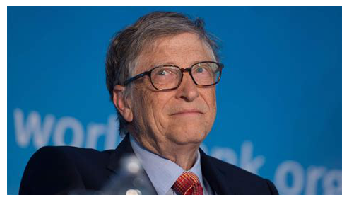

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Bill+gates&id=889DFA6CDA6196C405720F7265080F27B5959A30&simid=607995496934214715
name      : Bill Gates Net Worth: 5 Fast Facts You Need to Know ...
thumbnailUrl: https://tse4.mm.bing.net/th?id=OIP.XPvDQ2Yk9qRG39Z37XO9JwHaEL&pid=Api
datePublished: 2018-05-18T01:59:00.0000000Z
isFamilyFriendly: True
contentUrl: https://heavyeditorial.files.wordpress.com/2018/04/billgates-e1526608219903.jpg?quality=65&strip=all
hostPageUrl: https://heavy.com/money/2018/05/bill-gates-net-worth/
contentSize: 382203 B
encodingFormat: jpeg
hostPageDisplayUrl: https://heavy.com/money/2018/05/bill-gates-net-worth
width     : 3416
height    : 1926
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.N0vxu4_uYzlh2gZ-XEeAiQ&pid=Api
hostPageDomainFriendlyName: Heavy.com
thumbnail : {'width': 474, 'height': 267}
imageInsightsToken: ccid_XPvDQ2Yk*mid_889DFA6CDA6196C405720F7265080F27B5959A30*simid_607995496934214715*thid_OIP.XPvDQ2Yk9qRG39Z37XO

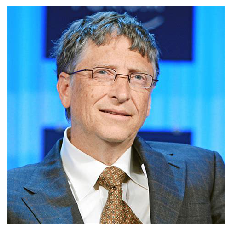

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Bill+gates&id=CEE9E189FE0633F55514DE5315172BDA49C46E3F&simid=608027631830896549
name      : Bill Gates - Microsoft, Family & Quotes - Biography
thumbnailUrl: https://tse1.mm.bing.net/th?id=OIP.wAAwaqH6JuGfeCcOfJnBWwHaHa&pid=Api
datePublished: 2019-10-21T17:33:00.0000000Z
isFamilyFriendly: True
contentUrl: https://www.biography.com/.image/t_share/MTY2MzU3MzIyODc5MjE1Mjk1/billgates2012.jpg
hostPageUrl: https://www.biography.com/business-figure/bill-gates
contentSize: 305647 B
encodingFormat: jpeg
hostPageDisplayUrl: https://www.biography.com/business-figure/bill-gates
width     : 1200
height    : 1200
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.BCX7MRTY3tgMTMHxJiwt-A&pid=Api
hostPageDomainFriendlyName: BIO
thumbnail : {'width': 474, 'height': 474}
imageInsightsToken: ccid_wAAwaqH6*mid_CEE9E189FE0633F55514DE5315172BDA49C46E3F*simid_608027631830896549*thid_OIP.wAAwaqH6JuGfeCcOfJnBWwHaHa
insightsMetadata: {'

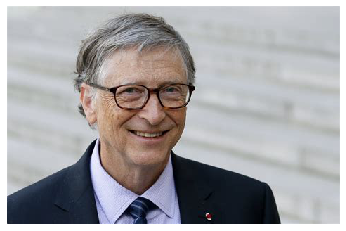

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Bill+gates&id=504D007F458EF3380F7F1AA33D7555E7F42B258A&simid=608024140062852354
name      : Bill Gates Talks About Eradicating Poverty in Africa | Time
thumbnailUrl: https://tse3.mm.bing.net/th?id=OIP.1OedFHa3WFJumyXy5cktBwHaE2&pid=Api
datePublished: 2018-09-21T16:56:00.0000000Z
isFamilyFriendly: True
contentUrl: https://timedotcom.files.wordpress.com/2018/09/bill-gates-africa.jpg?quality=85
hostPageUrl: http://time.com/5402366/bill-gates-africa-development/
contentSize: 931535 B
encodingFormat: jpeg
hostPageDisplayUrl: time.com/5402366/bill-gates-africa-development
width     : 3789
height    : 2483
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.hYLoALMjKIjPBd_pZ2jakg&pid=Api
hostPageDomainFriendlyName: Time
thumbnail : {'width': 474, 'height': 310}
imageInsightsToken: ccid_1OedFHa3*mid_504D007F458EF3380F7F1AA33D7555E7F42B258A*simid_608024140062852354*thid_OIP.1OedFHa3WFJumyXy5cktBwHaE2
insightsMetadata: {

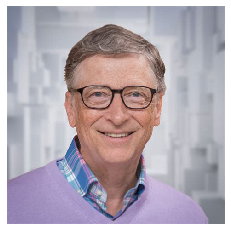

webSearchUrl: https://www.bing.com/images/search?view=detailv2&FORM=OIIRPO&q=Bill+gates&id=2B45883EA9CFC6B7BE2360E4B7610CD0F1E8D57E&simid=608044704369739835
name      : Bill Gates - Stories
thumbnailUrl: https://tse1.mm.bing.net/th?id=OIP.SsTRMzKv92bjgfkxTwVNgwHaHa&pid=Api
datePublished: 2020-02-09T21:29:00.0000000Z
isFamilyFriendly: True
contentUrl: https://3er1viui9wo30pkxh1v2nh4w-wpengine.netdna-ssl.com/wp-content/uploads/prod/2014/08/BillGatesHeadshot.jpg
hostPageUrl: https://news.microsoft.com/exec/bill-gates/
contentSize: 1021789 B
encodingFormat: jpeg
hostPageDisplayUrl: https://news.microsoft.com/exec/bill-gates
width     : 2000
height    : 2000
hostPageFavIconUrl: https://www.bing.com/th?id=ODF.1mwpFVwNjfB1W0CjfaLq3w&pid=Api
hostPageDomainFriendlyName: Microsoft
thumbnail : {'width': 474, 'height': 474}
imageInsightsToken: ccid_SsTRMzKv*mid_2B45883EA9CFC6B7BE2360E4B7610CD0F1E8D57E*simid_608044704369739835*thid_OIP.SsTRMzKv92bjgfkxTwVNgwHaHa
insightsMetadata: {'recipeSourcesCou

In [ ]:
for val in res['value']:
  show_img(val['thumbnailUrl'])
  for k,v in val.items():
    print('{:10s}: {}'.format(k,v))
  print('-'*50, '\n')

# Final notes

- We can use this image search api to collect images of a **specific person** OR **specific object** etc. The applications are limitless

- Example:
  - Collect all cellphone images to train a model to detect cell phone in an image
  - Collect all the weapon images like guns, knives to prevent people entering with weapons into some specific places like temples or schools
  - ...
  - ...
